In [348]:
# predict insurance cost (regresion model)
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [351]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [352]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [354]:
data.shape

(1338, 7)

In [355]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [356]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [358]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [359]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [83]:
data.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<Axes: >

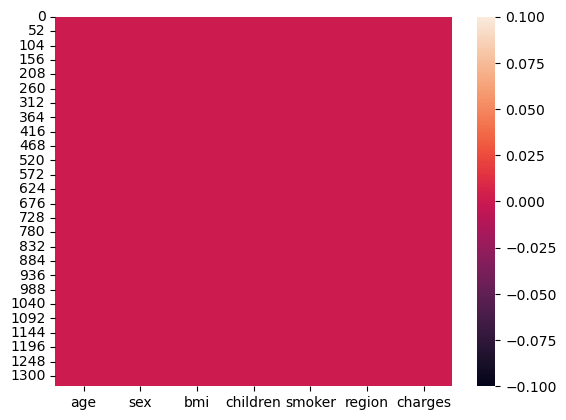

In [360]:
sns.heatmap(data.isna())

In [361]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [362]:
# checking value counts in each column
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [363]:
data.drop_duplicates(inplace=True)

In [364]:
data.duplicated().sum()

0

In [365]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [366]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# data analysisi we can see that no invalid no or negative values present
# count of each column is same so there is no missing values
# for bmi column 75% and max value deference is slightly high compared to 50 to 75%
# target variable is a continous data because unique values count  in the target column is high so its regression problem
# duplicate rows removed
# datatype of each column is correct according to the data present in it



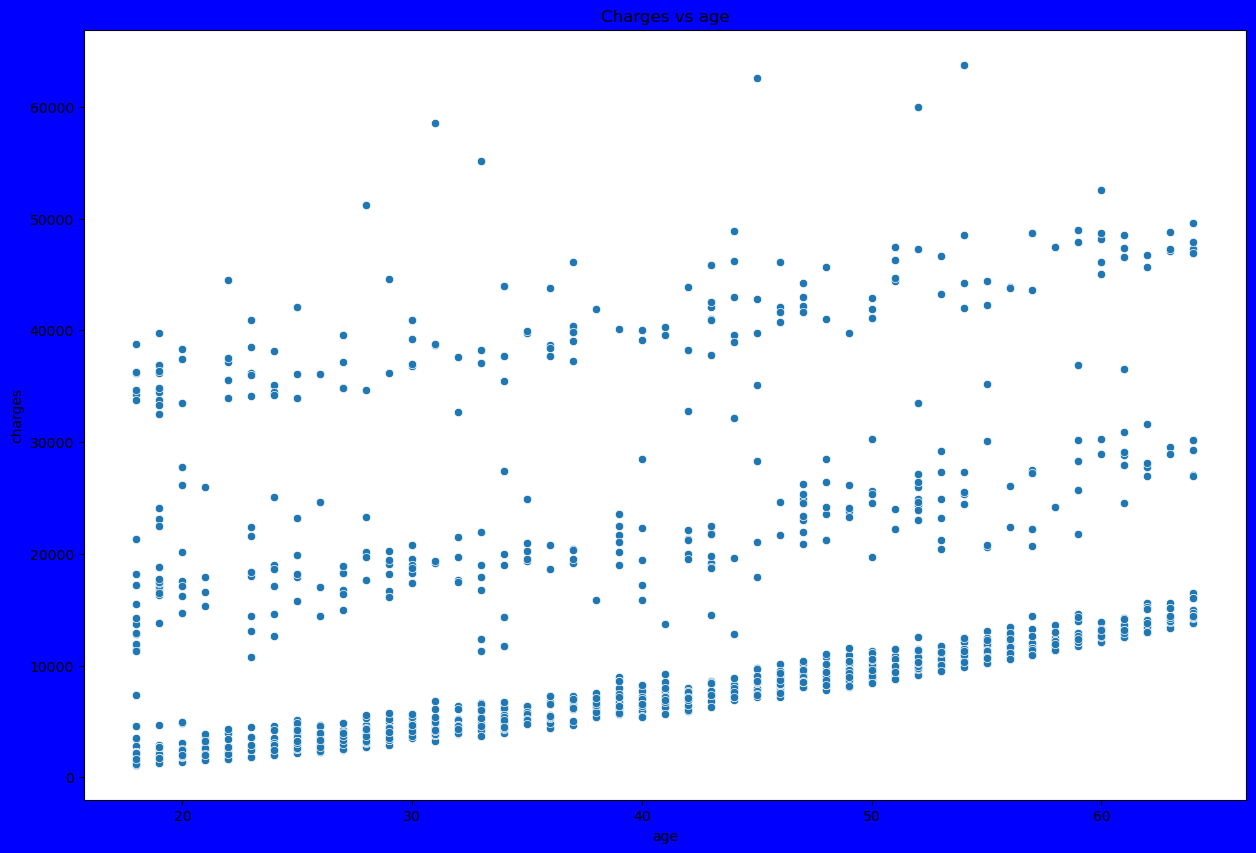

In [367]:
# visualise some features with target data
plt.figure(figsize=(15,10),facecolor='blue')
sns.scatterplot(x=data['age'],y=data['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Charges vs age')

plt.show()

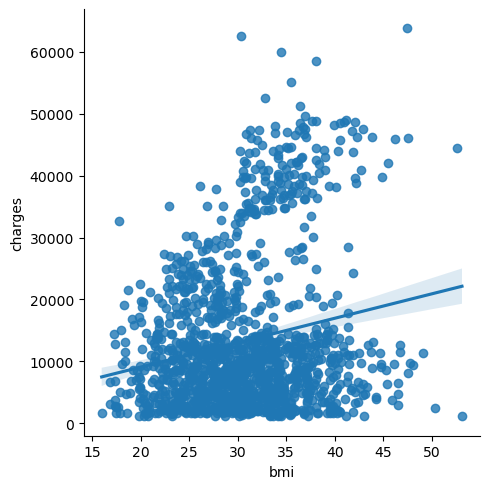

In [368]:
# we can see that there is a relation between age and charges when age increses charge also increses
#visualise relationship between bmi and charges
sns.lmplot(x='bmi',y='charges',data=data,palette='colorblind')


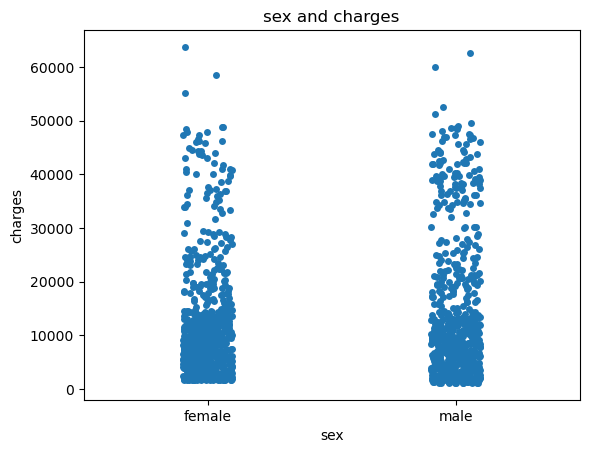

In [369]:
# we can see that bmi and carges  slightly corelated compared to charges vs age .lot of datapoints scattered outside best fit regression line
#compare gender and charges
sns.stripplot(x='sex',y='charges',data=data)
plt.title('sex and charges')
plt.show()

In [370]:
# we can see categorical data in dataset ,use ordinal encoder to convert into continous data
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [371]:
data['region'].value_counts()

2.0    364
3.0    325
1.0    324
0.0    324
Name: region, dtype: int64

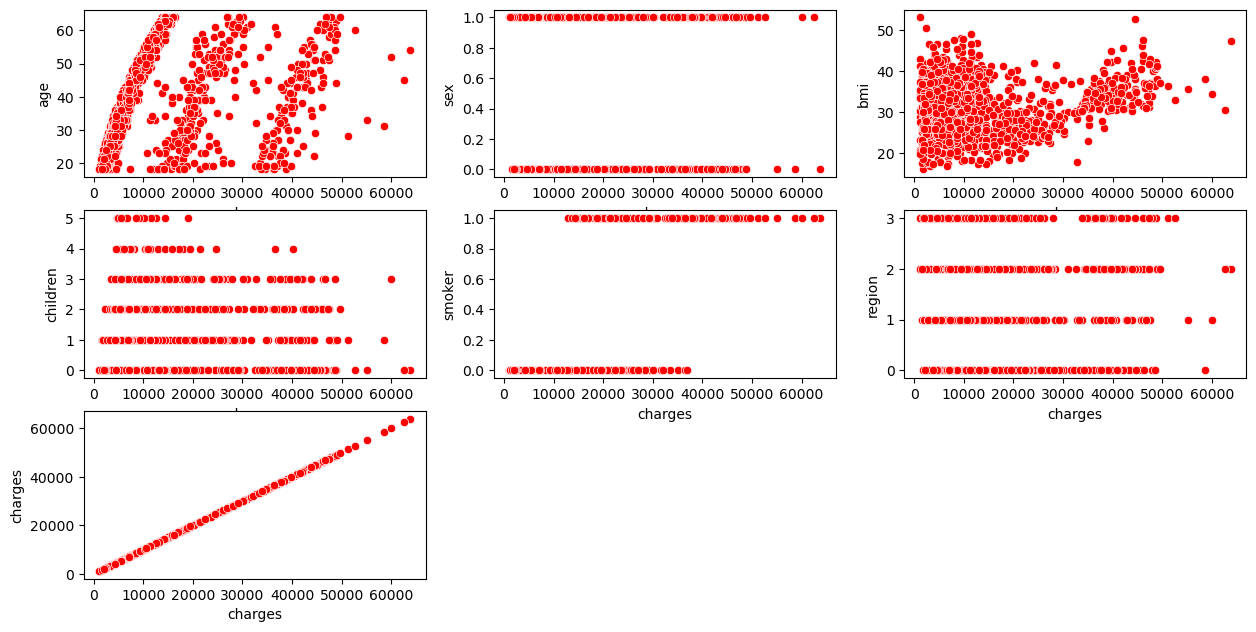

In [372]:
# visualise regplot to get regression line and datapoints
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in data:
    if p<=12:
        plt.subplot(4,3,p)
        sns.scatterplot(x='charges',y=i,data=data,color='red')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

In [ ]:
# from above plot we can see that smoning,bmi and age features are contributing to target but we need ome proof

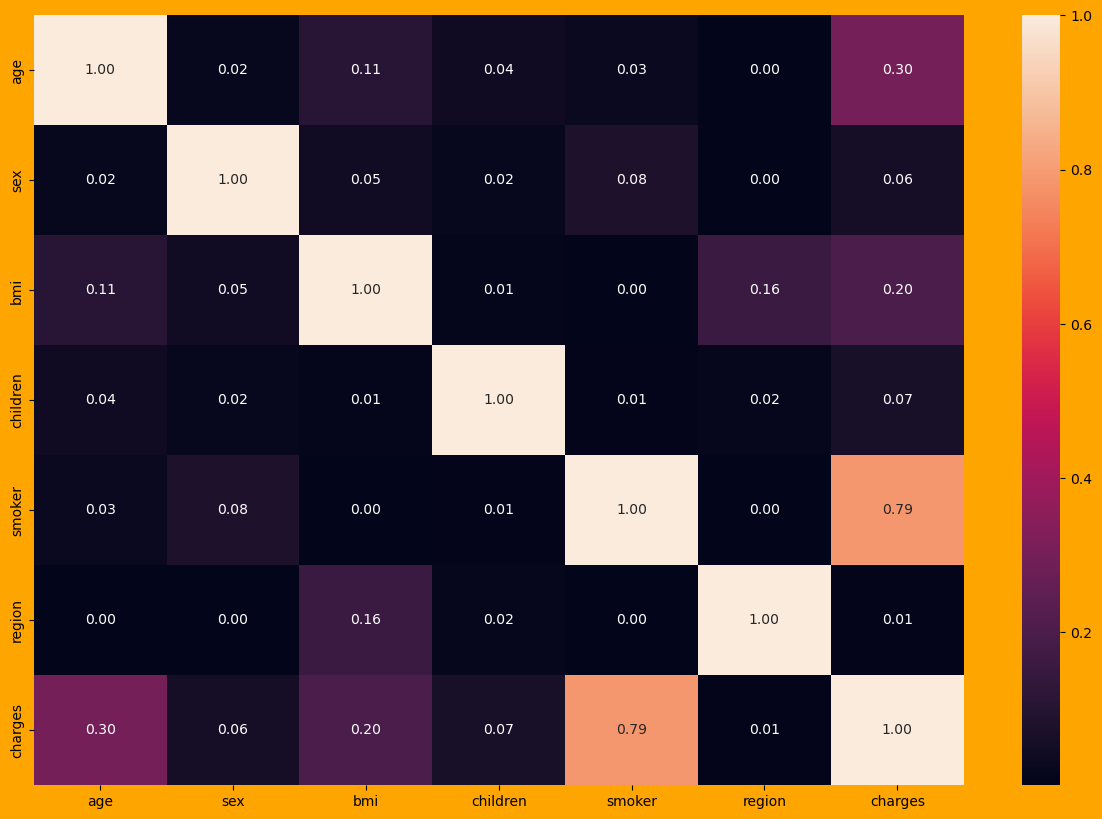

In [373]:
#visualise dataset to check feature and target relationship and relationship between features
# use heatmap
data_corr=data.corr().abs()
plt.figure(figsize=(15,10),facecolor='orange')
sns.heatmap(data_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

In [260]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


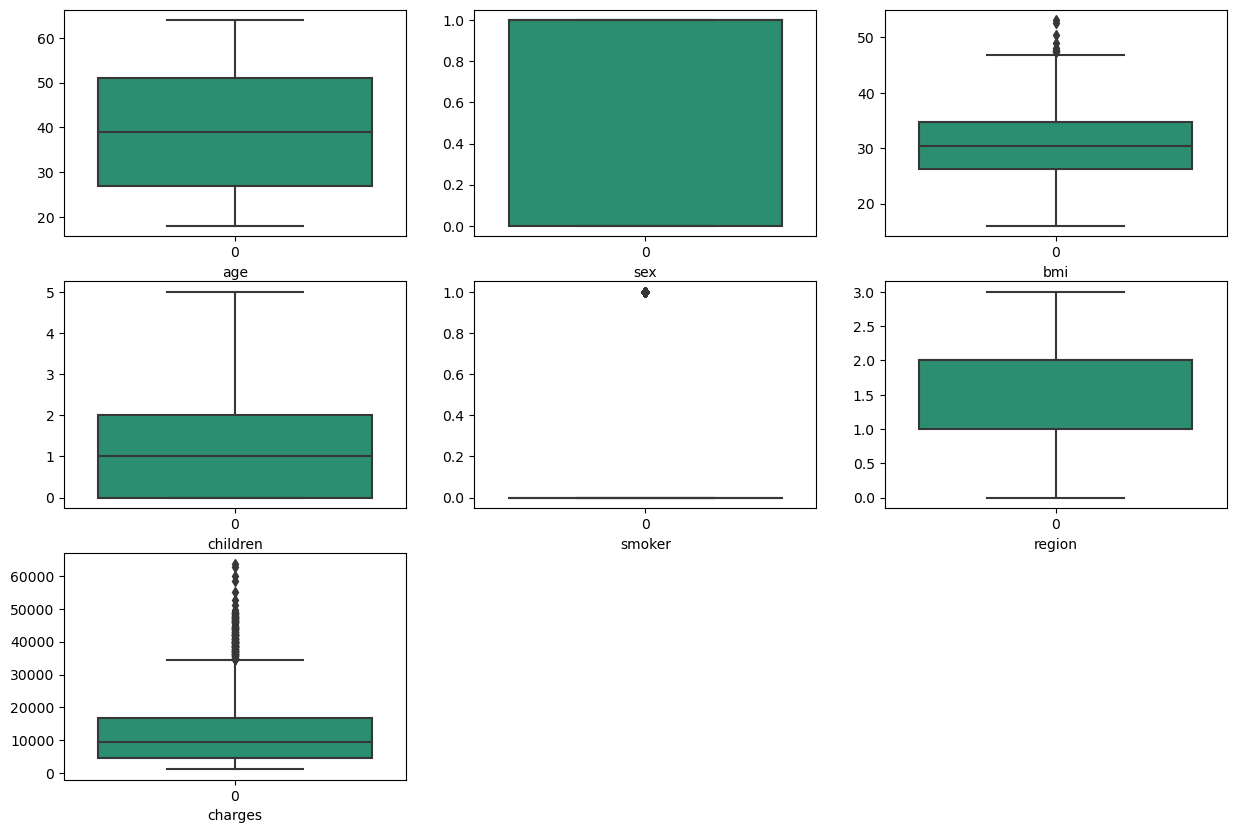

In [374]:
# check outliers with boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in data:
    if p<13:
        plt.subplot(3,3,p)
        sns.boxplot(data[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()

In [375]:
# we can see outliers in bmi so we can remove outliers using deferent techniques
from scipy.stats import zscore
df=data[['bmi','age']]
z=np.abs(zscore(df))
z

,bmi,age
0,0.453160,1.440418
1,0.509422,1.511647
2,0.383155,0.799350
3,1.305052,0.443201
4,0.292456,0.514431
...,...,...
1333,0.050269,0.767704
1334,0.206053,1.511647
1335,1.014490,1.511647
1336,0.797524,1.297958


In [376]:
np.where(z>2)

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
         383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
         547,  549,  563,  572,  581,  659,  673,  679,  700,  795,  810,
         820,  846,  859,  866,  894,  929,  940,  949,  950, 1023, 1028,
        1046, 1073, 1084, 1087, 1130, 1132, 1155, 1204, 1225, 1285, 1311,
        1316, 1331], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [377]:
z.iloc[116,0]

3.0167243979459

In [378]:
data1=data[(z<2).all(axis=1)]

In [379]:
data1.shape

(1280, 7)

In [380]:
# will check with iqr method
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
data2=data[~((data<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

In [151]:
data.shape

(1337, 7)

In [381]:
data2.shape

(1328, 7)

In [382]:
print('Data loss percentage after removing outliers using zscore',((data.shape[0]-data1.shape[0])/data.shape[0])*100)

Data loss percentage after removing outliers using zscore 4.263275991024682


In [383]:
print('data loss percentage after removing outliers using iqr ',((data.shape[0]-data2.shape[0])/data.shape[0])*100)

data loss percentage after removing outliers using iqr  0.6731488406881078


In [ ]:
# zscore method is best ,beacuse less amount of data removed with zscore method

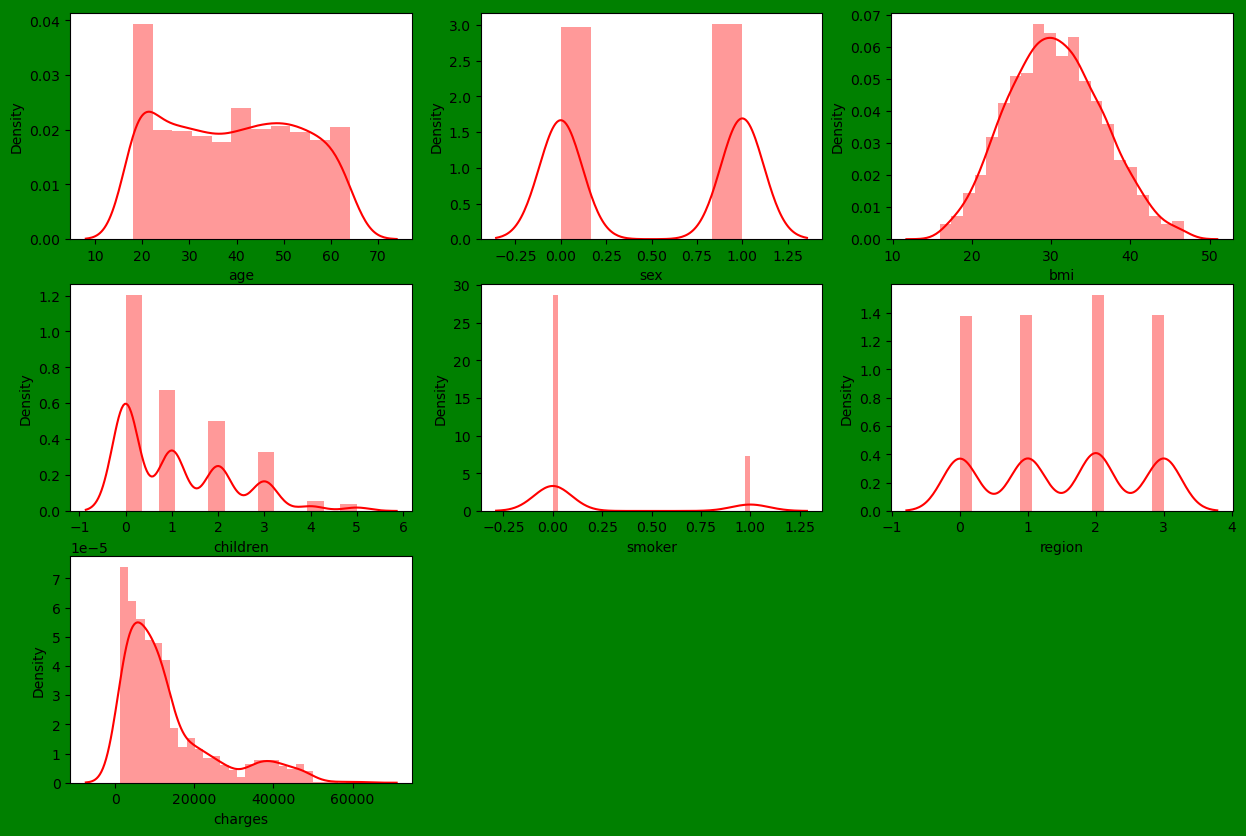

In [424]:
# check normal distribution 
plt.figure(figsize=(15,10),facecolor='green')
p=1
for i in data2:
    if p<=12:
        plt.subplot(3,3,p)
        sns.distplot(data2[i],color='r')
        plt.xlabel(i)
    p+=1
plt.show()

In [425]:
# checking skewness
data2.skew()

age         0.057521
sex        -0.015078
bmi         0.157141
children    0.935660
smoker      1.470251
region     -0.032620
charges     1.500088
dtype: float64

In [ ]:
# range for skewness is -0.5 to +0.5 we can find that children,smoker and charges have skewness but the children and smoker columns categorical data
# so no need to reduce skewness we will reduce skewness for charges column only

In [426]:
data2['charges']=np.cbrt(data['charges'])

In [427]:
data2['charges']=np.log1p(data['charges'])

In [428]:
data.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges    -0.060134
dtype: float64

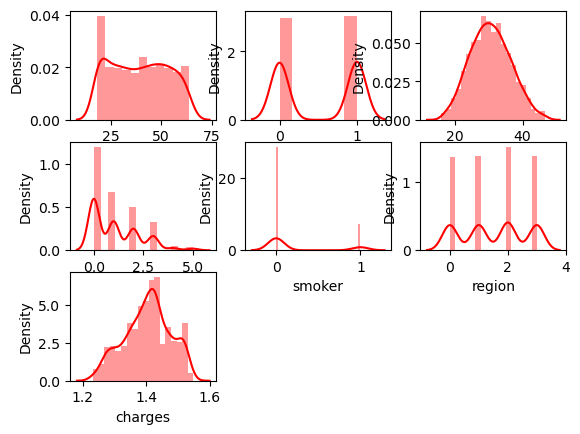

In [429]:
#plt.figure(figsize=(15,10),facecolor='green')
p=1
for i in data2:
    if p<=12:
        plt.subplot(3,3,p)
        sns.distplot(data2[i],color='r')
        plt.xlabel(i)
    p+=1
plt.show()

In [430]:
data2.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.018089,0.114785,0.042103,-0.025075,0.002306,0.540814
sex,-0.018089,1.000000,0.039966,0.019973,0.080269,0.003311,0.006881
bmi,0.114785,0.039966,1.000000,0.017366,-0.002868,0.155863,0.130145
children,0.042103,0.019973,0.017366,1.000000,0.007234,0.017331,0.167819
smoker,-0.025075,0.080269,-0.002868,0.007234,1.000000,-0.005359,0.648803
region,0.002306,0.003311,0.155863,0.017331,-0.005359,1.000000,-0.047905
charges,0.540814,0.006881,0.130145,0.167819,0.648803,-0.047905,1.000000


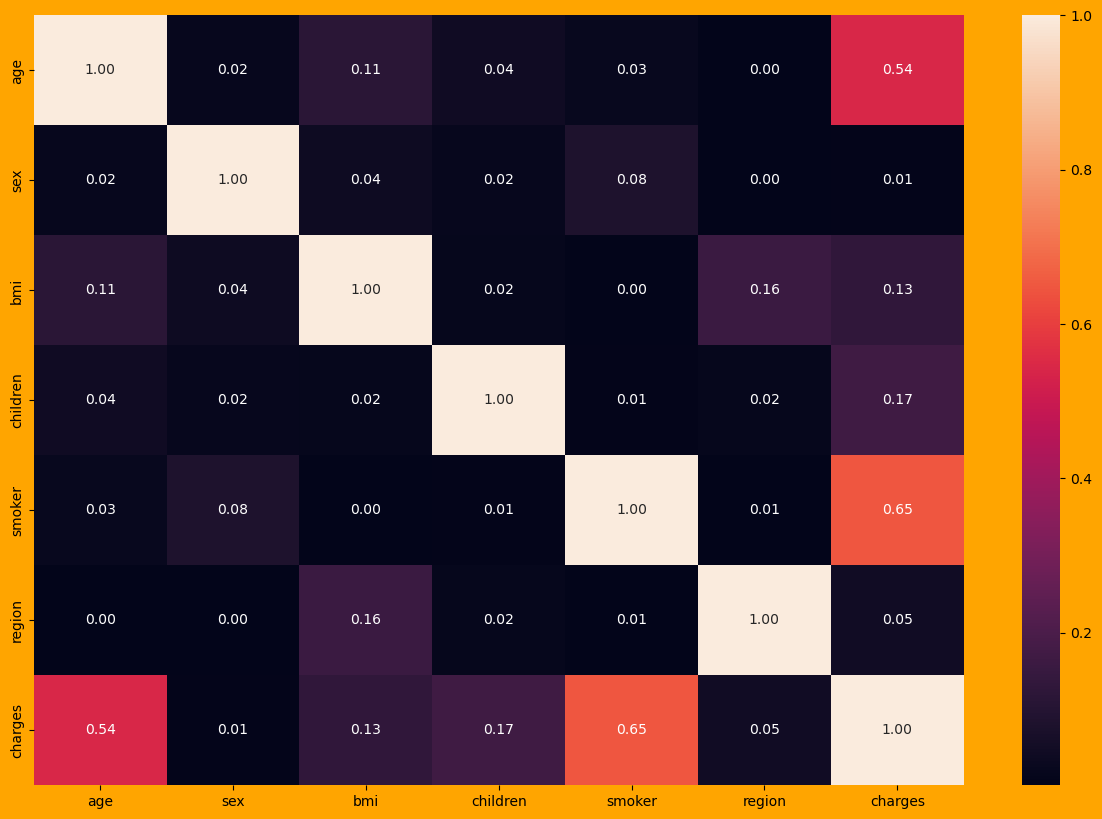

In [431]:
data_corr=data2.corr().abs()
plt.figure(figsize=(15,10),facecolor='orange')
sns.heatmap(data_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

In [ ]:
# features are not corelated so no multicolinearity present onlt features like age and smoker contribute to the target variable

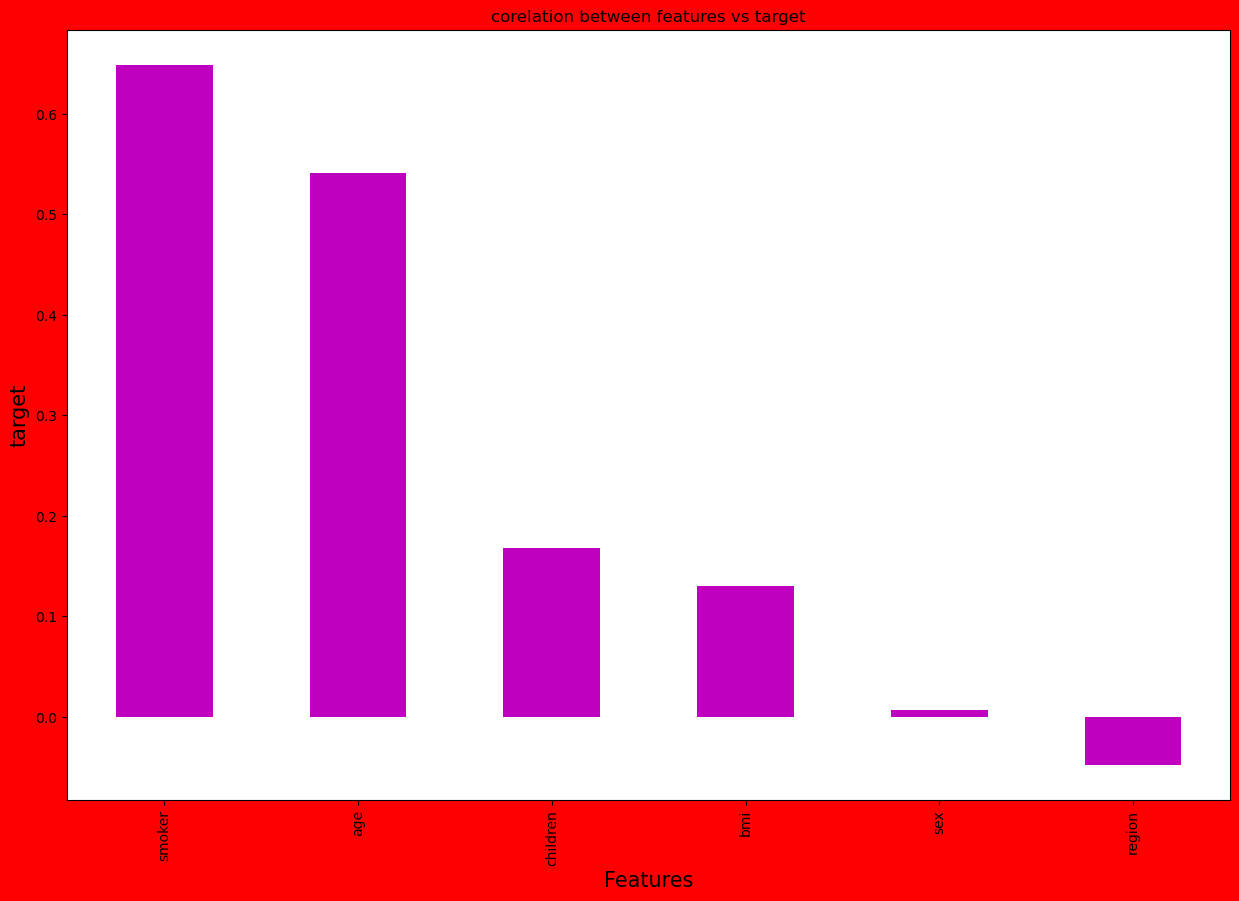

In [432]:
# visualise relarion between features and target
plt.figure(figsize=(15,10),facecolor='r')
data2.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Features',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation between features vs target')
plt.show()                                                                          

In [ ]:
# above plot we can see only 3 features contributing to the target 

In [433]:
x=data2.drop('charges',axis=1)
y=data2['charges']

In [434]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440429,-1.007559,-0.445495,-0.908563,1.974935,1.343447
1,-1.511669,0.992498,0.546068,-0.080442,-0.506346,0.439649
2,-0.799261,0.992498,0.415999,1.575799,-0.506346,0.439649
3,-0.443056,0.992498,-1.323037,-0.908563,-0.506346,-0.464149
4,-0.514297,0.992498,-0.279953,-0.908563,-0.506346,-0.464149
...,...,...,...,...,...,...
1323,0.768039,0.992498,0.073091,1.575799,-0.506346,-0.464149
1324,-1.511669,-1.007559,0.233565,-0.908563,-0.506346,-1.367947
1325,-1.511669,-1.007559,1.066343,-0.908563,-0.506346,0.439649
1326,-1.297947,-1.007559,-0.800228,-0.908563,-0.506346,1.343447


In [435]:
# checking data for multicolinearity using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.016415,age
1,1.008965,sex
2,1.040798,bmi
3,1.002634,children
4,1.007135,smoker
5,1.025443,region


In [436]:
# no multicolinearity between features
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

In [437]:
def metric_score(clf,x_train,x_test,y_train,y_test):

    maxACC=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        clf=GradientBoostingRegressor()
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
    print('max accuracy score is ',maxACC,'on random state',maxRS)

In [438]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [439]:
metric_score(clf,x_train,x_test,y_train,y_test)

max accuracy score is  0.7979500534501026 on random state 199


In [440]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

max accuracy score is  0.8561806640889131 on random state 199


In [450]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [442]:
GBT=GradientBoostingRegressor()
GBT.fit(x_train,y_train)
GBT_pred=GBT.predict(x_test)
GBT_pred_train=GBT.predict(x_train)
print('R2 score',r2_score(y_test,GBT_pred)*100)
print('R2 score for trainng data',r2_score(y_train,GBT_pred_train))
print('mean absolute error',mean_absolute_error(y_test,GBT_pred))
print('mean squared error',mean_squared_error(y_test,GBT_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,GBT_pred)))



R2 score 82.39341165225366
R2 score for trainng data 0.8886208120171124
mean absolute error 0.016217944080302495
mean squared error 0.0009106608662466003
Root mean absolute error 0.12734969210917824


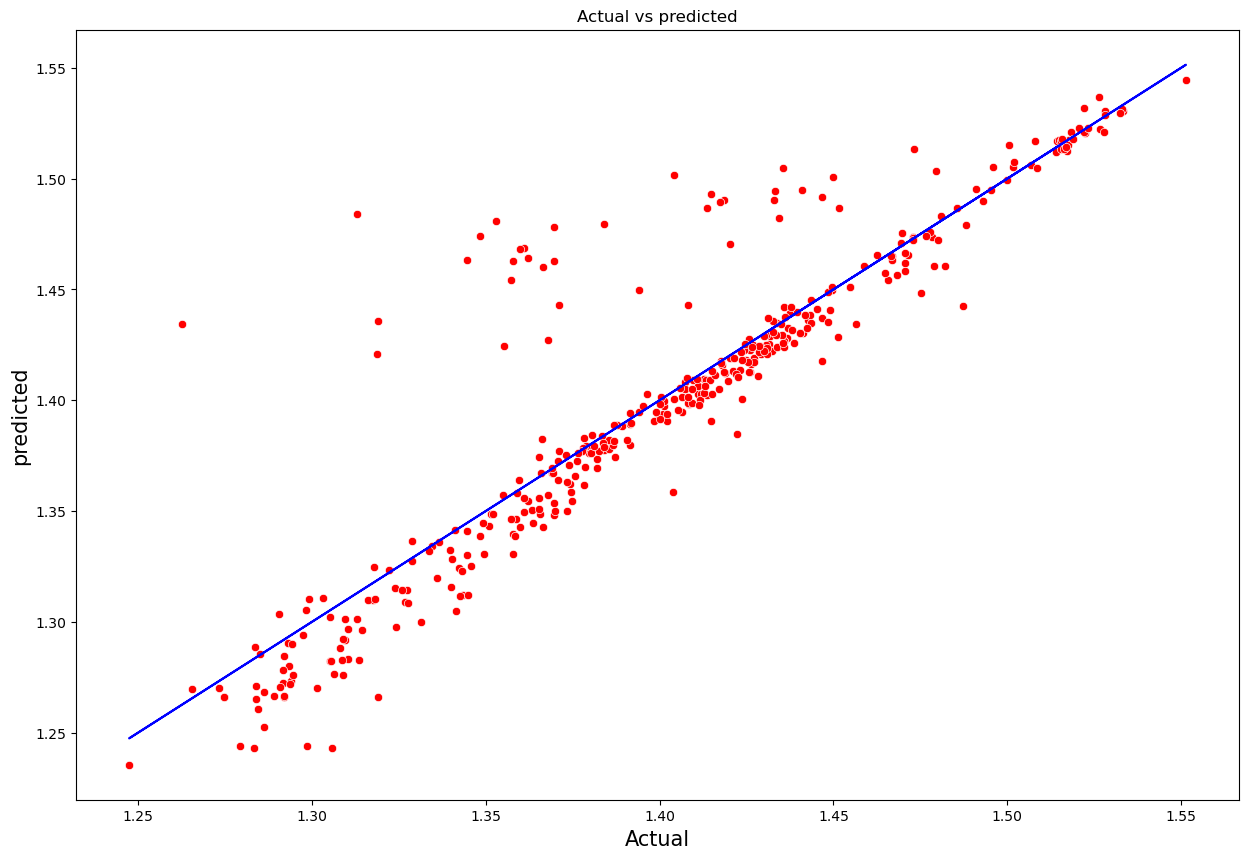

In [443]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=GBT_pred,y=y_test,color='r')
plt.plot(GBT_pred,GBT_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('predicted',fontsize=15)
plt.title('Actual vs predicted')
plt.show()


In [444]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred_train=LR.predict(x_train)
print('R2 score',r2_score(y_test,LR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,LR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,LR_pred))
print('mean absolute error',mean_squared_error(y_test,LR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,LR_pred)))

R2 score 74.89193273161082
R2 score for trainng data 0.765066059309133
mean absolute error 0.023085331685520107
mean absolute error 0.0012986578567525796
Root mean absolute error 0.15193857866098429


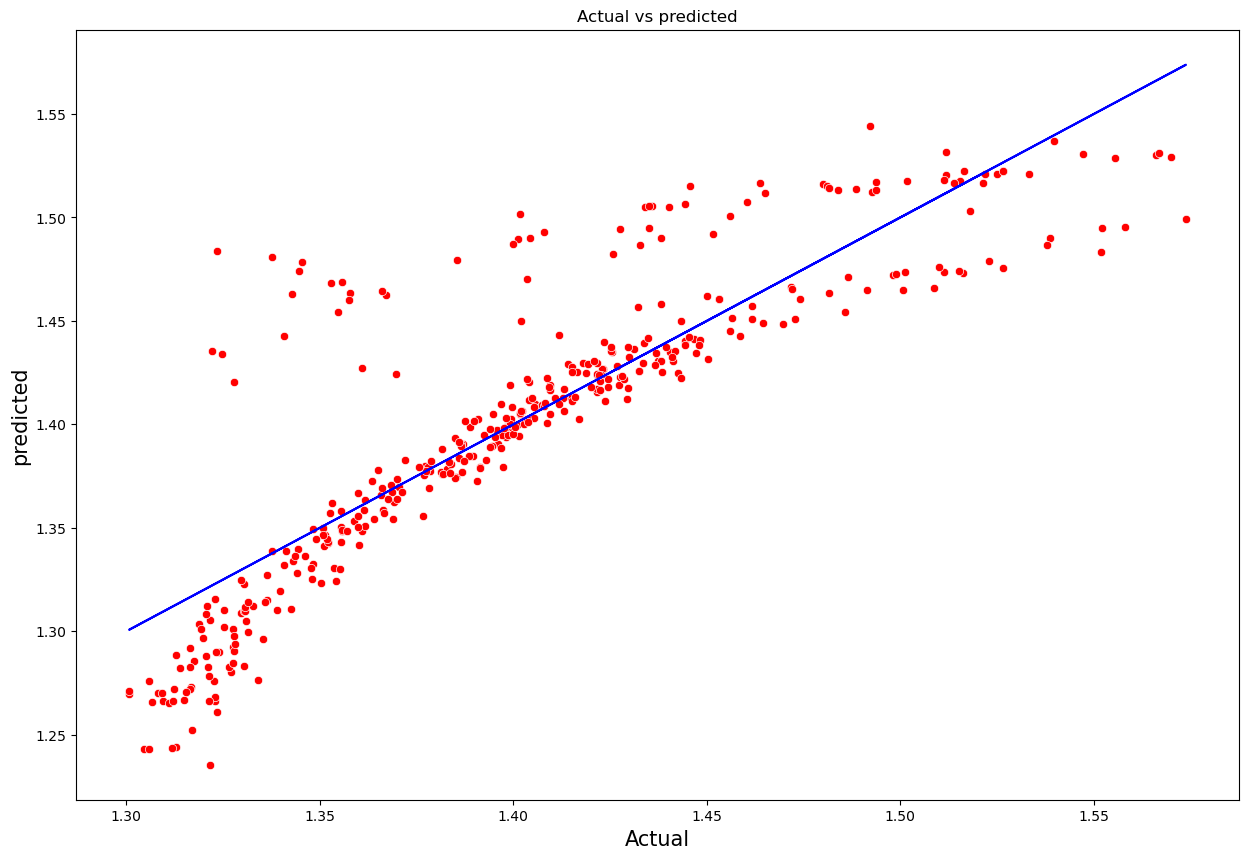

In [445]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=LR_pred,y=y_test,color='r')
plt.plot(LR_pred,LR_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('predicted',fontsize=15)
plt.title('Actual vs predicted')
plt.show()

In [446]:
knn=KNN()
knn.fit(x_train,y_train)
KNN_pred=knn.predict(x_test)
KNN_pred_train=knn.predict(x_train)
print('R2 score',r2_score(y_test,KNN_pred)*100)
print('R2 score for trainng data',r2_score(y_train,KNN_pred_train))
print('mean absolute error',mean_absolute_error(y_test,KNN_pred))
print('mean absolute error',mean_squared_error(y_test,KNN_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,KNN_pred)))

R2 score 80.53630924977718
R2 score for trainng data 0.853324288195378
mean absolute error 0.01976195095910016
mean absolute error 0.0010067152777626367
Root mean absolute error 0.1405772063995446


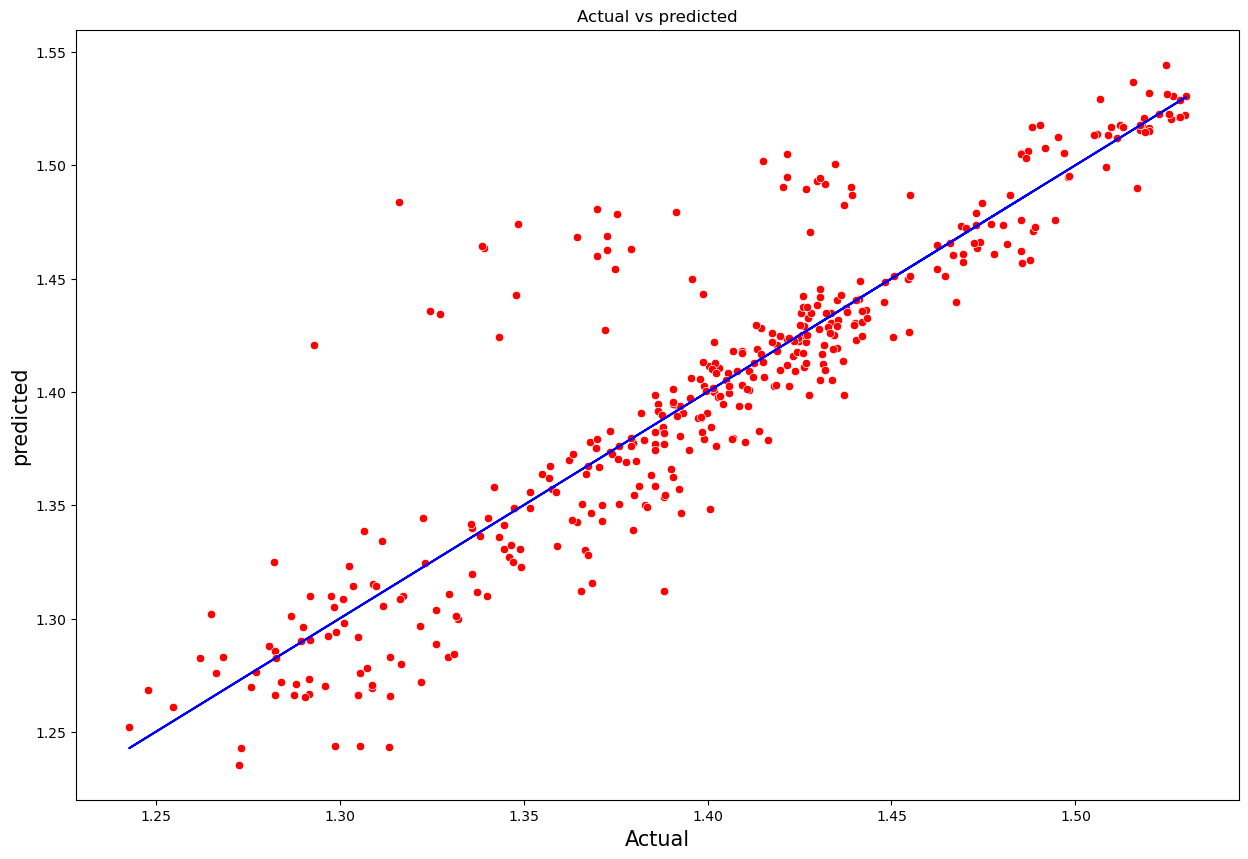

In [447]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=KNN_pred,y=y_test,color='r')
plt.plot(KNN_pred,KNN_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('predicted',fontsize=15)
plt.title('Actual vs predicted')
plt.show()

In [452]:
RIDGE=Ridge()
RIDGE.fit(x_train,y_train)
RIDGE_pred=RIDGE.predict(x_test)
RIDGE_pred_train=RIDGE.predict(x_train)
print('R2 score',r2_score(y_test,RIDGE_pred)*100)
print('R2 score for trainng data',r2_score(y_train,RIDGE_pred_train))
print('mean absolute error',mean_absolute_error(y_test,RIDGE_pred))
print('mean absolute error',mean_squared_error(y_test,RIDGE_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,RIDGE_pred)))

R2 score 74.88880169056385
R2 score for trainng data 0.7650651702716599
mean absolute error 0.02309554721994999
mean absolute error 0.001298819802752325
Root mean absolute error 0.1519721922588142


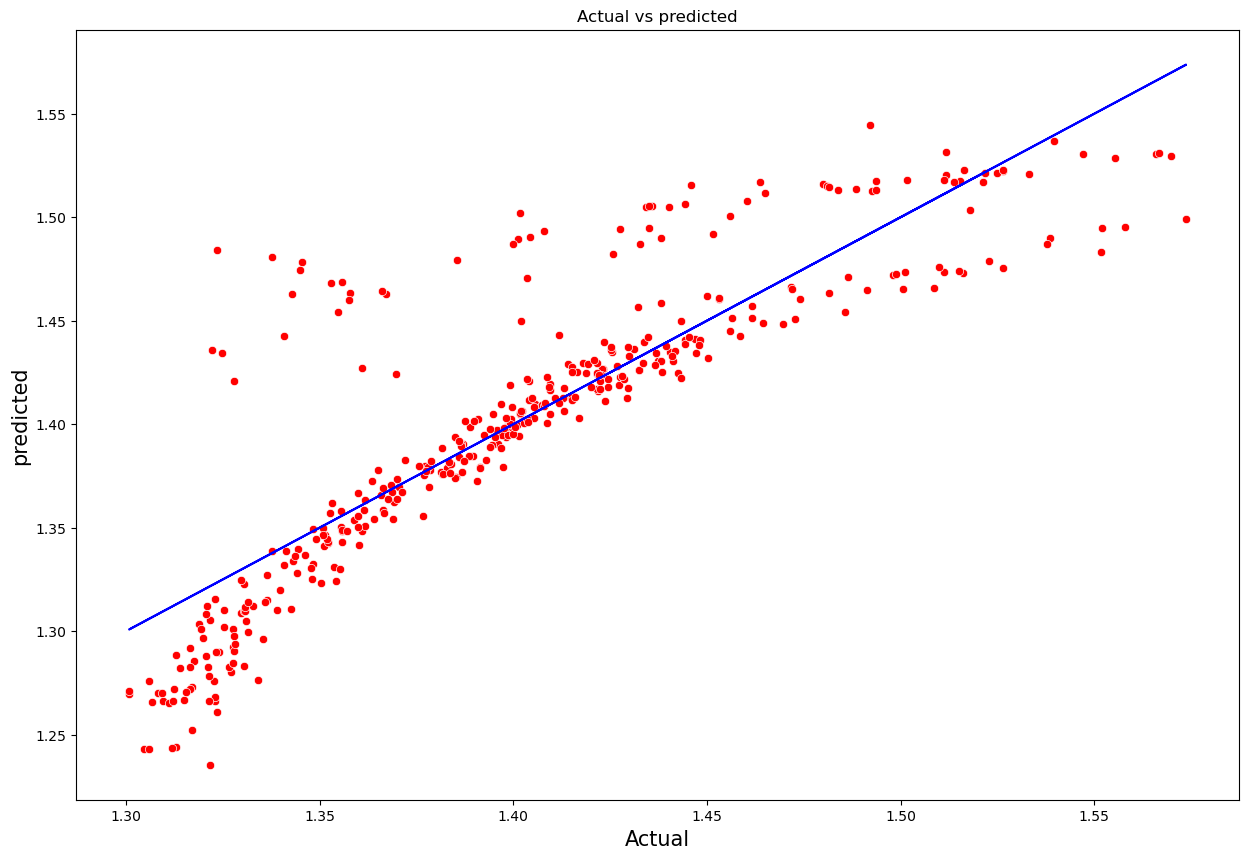

In [454]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=RIDGE_pred,y=y_test,color='r')
plt.plot(RIDGE_pred,RIDGE_pred,color='b')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('predicted',fontsize=15)
plt.title('Actual vs predicted')
plt.show()

In [455]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('R2 score',r2_score(y_test,DT_pred)*100)
print('R2 score for trainng data',r2_score(y_train,DT_pred_train))
print('mean absolute error',mean_absolute_error(y_test,DT_pred))
print('mean absolute error',mean_squared_error(y_test,DT_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,DT_pred)))

R2 score 68.56016332753421
R2 score for trainng data 0.993354242075752
mean absolute error 0.018636815046859552
mean absolute error 0.0016261542743721915
Root mean absolute error 0.13651672075925186


In [456]:
from sklearn.svm import SVR

SVM=SVR()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_pred_train=SVM.predict(x_train)
print('R2 score',r2_score(y_test,SVM_pred)*100)
print('R2 score for trainng data',r2_score(y_train,SVM_pred_train))
print('mean absolute error',mean_absolute_error(y_test,SVM_pred))
print('mean absolute error',mean_squared_error(y_test,SVM_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,SVM_pred)))

R2 score 29.413969847182287
R2 score for trainng data 0.2635929426055209
mean absolute error 0.05272034749168688
mean absolute error 0.0036509023834876858
Root mean absolute error 0.2296091189210195


In [457]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
ETR_pred_train=ETR.predict(x_train)
print('R2 score',r2_score(y_test,ETR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,ETR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,ETR_pred))
print('mean absolute error',mean_squared_error(y_test,ETR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,ETR_pred)))

R2 score 78.9444274624378
R2 score for trainng data 0.993354242075752
mean absolute error 0.015997792670854893
mean absolute error 0.0010890517542445344
Root mean absolute error 0.12648238087123


In [458]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_pred_train=RFR.predict(x_train)
print('R2 score',r2_score(y_test,RFR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,RFR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,RFR_pred))
print('mean absolute error',mean_squared_error(y_test,RFR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,RFR_pred)))

R2 score 81.12466388658355
R2 score for trainng data 0.9679502726072196
mean absolute error 0.016814599383179873
mean absolute error 0.0009762839680374409
Root mean absolute error 0.1296711200814579


In [459]:
from sklearn.model_selection import cross_val_score

In [477]:
val_score=cross_val_score(GBT,x,y,cv=5,scoring='r2')
print('r2 score ',r2_score(y_test,GBT_pred)*100)
print('cross validation score ',val_score)
print('average score :',val_score.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,GBT_pred)-val_score.mean())*100)

r2 score  82.39341165225366
cross validation score  [0.87613015 0.72619776 0.90129616 0.83983373 0.79689187]
average score : 82.80699335715653
deference between r2 score and cross validation score : -0.4135817049028656


In [476]:
val_score1=cross_val_score(LR,x,y)
print('r2 score ',r2_score(y_test,LR_pred)*100)
print('cross validation score ',val_score1)
print('average score :',val_score1.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,LR_pred)-val_score1.mean())*100)

r2 score  74.89193273161082
cross validation score  [0.79352438 0.68401636 0.82609393 0.75944237 0.72305093]
average score : 75.722559499739
deference between r2 score and cross validation score : -0.8306267681281843


In [475]:
val_score2=cross_val_score(knn,x,y)
print('r2 score ',r2_score(y_test,KNN_pred)*100)
print('cross validation score ',val_score2)
print('average score :',val_score2.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,KNN_pred)-val_score2.mean())*100)

r2 score  80.53630924977718
cross validation score  [0.85150055 0.68693764 0.84542276 0.80919554 0.78114635]
average score : 79.48405693460839
deference between r2 score and cross validation score : 1.052252315168778


In [474]:
val_score3=cross_val_score(DT,x,y)
print('r2 score ',r2_score(y_test,DT_pred)*100)

print('cross validation score ',val_score3)
print('average score :',val_score3.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,DT_pred)-val_score3.mean())*100)

r2 score  68.56016332753421
cross validation score  [0.74516987 0.62437641 0.616555   0.67082911 0.65489324]
average score : 66.23647279179686
deference between r2 score and cross validation score : 2.323690535737355


In [473]:
val_score4=cross_val_score(RFR,x,y)
print('r2 score ',r2_score(y_test,RFR_pred)*100)
print('cross validation score ',val_score5)
print('average score :',val_score4.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,RFR_pred)-val_score4.mean())*100)


r2 score  81.12466388658355
cross validation score  [0.79347475 0.684135   0.82594657 0.75947655 0.72310916]
average score : 80.68325677574595
deference between r2 score and cross validation score : 0.4414071108375994


In [472]:
val_score5=cross_val_score(RIDGE,x,y)
print('r2 score ',r2_score(y_test,RIDGE_pred)*100)
print('cross validation score ',val_score5)
print('average score :',val_score5.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,RIDGE_pred)-val_score5.mean())*100)

r2 score  74.88880169056385
cross validation score  [0.79347475 0.684135   0.82594657 0.75947655 0.72310916]
average score : 75.72284061806612
deference between r2 score and cross validation score : -0.8340389275022564


In [471]:
val_score6=cross_val_score(SVM,x,y)
print('r2 score ',r2_score(y_test,SVM_pred)*100)
print('cross validation score ',val_score6)
print('average score :',val_score6.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,SVM_pred)-val_score6.mean())*100)

r2 score  29.413969847182287
cross validation score  [0.28461375 0.43010819 0.29787883 0.30545287 0.18712255]
average score : 30.103523970957674
deference between r2 score and cross validation score : -0.6895541237753877


In [469]:
val_score7=cross_val_score(ETR,x,y)
print('r2 score ',r2_score(y_test,ETR_pred)*100)
print('cross validation score ',val_score7)
print('average score :',val_score7.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,ETR_pred)-val_score7.mean())*100)

r2 score  78.9444274624378
cross validation score  [0.81692733 0.67244229 0.84705342 0.78904664 0.7707597 ]
average score : 77.9245874849312
deference between r2 score and cross validation score : 1.019839977506598


In [ ]:
# AFTER CROSS VALIDATION WE CAN SEE THAT RIDGE REGRESSION IS THE BEST MODEL BECAUSE DEFERENCE BETWEEN R2 SCORE AND CROSS VALIDATION SCORE IS LESS IN RIDGE REGRESSION   MODEL

(1333, 7)

,age,bmi,smoker,charges
0,19,27.900,1.0,16884.92400
1,18,33.770,0.0,1725.55230
2,28,33.000,0.0,4449.46200
3,33,22.705,0.0,21984.47061
4,32,28.880,0.0,3866.85520
...,...,...,...,...
1333,50,30.970,0.0,10600.54830
1334,18,31.920,0.0,2205.98080
1335,18,36.850,0.0,1629.83350
1336,21,25.800,0.0,2007.94500


,age,bmi,smoker
0,-1.443917,-0.450191,1.970478
1,-1.515225,0.527991,-0.507491
2,-0.802147,0.399678,-0.507491
3,-0.445607,-1.315891,-0.507491
4,-0.516915,-0.286883,-0.507491
...,...,...,...
1328,0.766626,0.061396,-0.507491
1329,-1.515225,0.219705,-0.507491
1330,-1.515225,1.041245,-0.507491
1331,-1.301302,-0.800137,-0.507491


GradientBoostingRegressor()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- children
- region
- sex
